<div style="display:block" direction=rtl align=right><br><br>
    <div  style="width:100%;margin:100;display:block"  display=block align=center>
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
        <span><br><font size=5>University of Tehran , school of ECE</font></span>
        <span><br><font size=3>Deep Learning</font></span>
        <span><br><font size=3>Spring 2023</font></span>
    </div><br><br><br>
    <div style="display:block" align=left display=block> 
        <font size=3>Pytorch tutorial - Dataloader</font><br>
        <hr />
        <font size=3>TA: <a href="mailto:farshads7778@gmail.com">Farshad Sangari</a></font><br>
    </div>
</div>

# Import libraries

In [2]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image

import os
import glob
import random
import matplotlib.pyplot as plt


## Load data

#### Method1 - torchvision

In [3]:
mnist_train_transform = transforms.Compose(
                    [transforms.RandomRotation(10),
                    transforms.ToTensor(),
                    transforms.Normalize((0.1307,), (0.3081,))])

mnist_val_transform = transforms.Compose(
                    [transforms.ToTensor(),
                    transforms.Normalize((0.1307,), (0.3081,))])

In [4]:
mnist_train_set = torchvision.datasets.MNIST(root='./data',
                                       train=True,
                                       download=True,
                                       transform=mnist_train_transform)

mnist_val_set = torchvision.datasets.MNIST(root='./data',
                                       train=False,
                                       download=True,
                                       transform=mnist_val_transform)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
mnist_train_loader = torch.utils.data.DataLoader(mnist_train_set,
                                                batch_size=16,
                                                shuffle=True)

mnist_val_loader = torch.utils.data.DataLoader(mnist_val_set,
                                                batch_size=16,
                                                shuffle=False)

#### Method2

In [6]:
DIR_TRAIN = "./data/CIFAR10/train/"
DIR_VAL = "./data/CIFAR10/val/"

In [9]:
classes = os.listdir(DIR_TRAIN)
print("Total Classes: ", len(classes))

train_imgs = []
val_imgs  = []
for _class in classes:
    train_imgs += glob.glob(DIR_TRAIN + _class + '/*.jpg')
    val_imgs += glob.glob(DIR_VAL + _class + '/*.jpg')

print("\nTotal train images: ", len(train_imgs))
print("Total test images: ", len(val_imgs))

Total Classes:  10

Total train images:  50000
Total test images:  10000


In [ ]:
cifar_transforms_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.49139968, 0.48215827 ,0.44653124), (0.24703233,0.24348505,0.26158768))])

cifar_transforms_val = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.49139968, 0.48215827 ,0.44653124), (0.24703233,0.24348505,0.26158768))])

In [10]:
class CIFAR10Dataset(Dataset):
    
    def __init__(self, imgs_list, classes, transforms=None):
        super(CIFAR10Dataset, self).__init__()
        self.imgs_list = imgs_list
        self.class_to_int = {classes[i] : i for i in range(len(classes))}
        self.transforms = transforms
    def __getitem__(self, index):
    
        image_path = self.imgs_list[index]
        
        # Reading image
        image = Image.open(image_path)
        
        # Retriving class label
        label = image_path.split("/")[-2]
        label = self.class_to_int[label]
        
        # Applying transforms on image
        if self.transforms is not None:
            image = self.transforms(image)
        else:
            image = transforms.ToTensor()(image)
        return image, label
        

    def __len__(self):
        return len(self.imgs_list)

In [11]:
train_dataset = CIFAR10Dataset(imgs_list = train_imgs, classes = classes, transforms = cifar_transforms_train)
val_dataset = CIFAR10Dataset(imgs_list = val_imgs, classes = classes, transforms = cifar_transforms_val)

In [12]:
cifar_train_loader = torch.utils.data.DataLoader(train_dataset,
                                                batch_size=16,
                                                shuffle=True)

cifar_val_loader = torch.utils.data.DataLoader(val_dataset,
                                                batch_size=16,
                                                shuffle=False)

#### Implementation torchvision datasets using method 2

In [157]:
class MNISTDataset(Dataset):
    def __init__(self,mode, transforms=None):
        super(MNISTDataset, self).__init__()
        self.transforms = transforms
        is_train = True if mode == "train" else False
        self.data = torchvision.datasets.MNIST(
                                       root='./data',
                                       train=is_train,
                                       download=True)

    def __getitem__(self, index):
    
        image, label = self.data[index]
        
        # Applying transforms on image
        if self.transforms is not None:
            image = self.transforms(image)
        else:
            image = transforms.ToTensor()(image)
        return image, label

    def __len__(self):
        return len(self.data)

In [277]:
MNIST_train = MNISTDataset(mode = "train" , transforms=mnist_train_transform)
MNIST_val = MNISTDataset(mode = "val" , transforms=mnist_val_transform)

## Imshow CIFAR images 

In [412]:
sample = next(iter(cifar_val_loader))

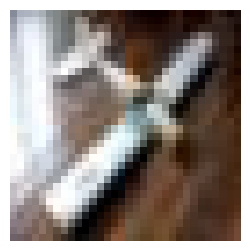

In [437]:
import numpy as np
def plot_input_sample(batch_data,
                      mean = [0.49139968, 0.48215827 ,0.44653124],
                      std = [0.24703233,0.24348505,0.26158768],
                      to_denormalize = False,
                      figsize = (3,3)):
    
    batch_image,_ = batch_data
    batch_size = batch_image.shape[0]
    
    random_batch_index = random.randint(0,batch_size-1)
    random_image = batch_image[random_batch_index]
    
    image_transposed = random_image.detach().numpy().transpose((1, 2, 0))
    if to_denormalize:
        image_transposed = np.array(std)*image_transposed + np.array(mean)
        image_transposed = image_transposed.clip(0,1)
    fig, ax = plt.subplots(1, figsize=figsize)
    ax.imshow(image_transposed)
    ax.set_axis_off()
    
    
     
sample = next(iter(cifar_val_loader))

plot_input_sample(batch_data=sample,
                  mean = [0.49139968, 0.48215827 ,0.44653124],
                  std = [0.24703233,0.24348505,0.26158768],
                  to_denormalize = True,
                  figsize = (3,3))
